<img src="./assets/img/teclab_logo.png" alt="Teclab logo" width="170">

**Author**: Hector Vergara ([LinkedIn](https://www.linkedin.com/in/hector-vergara/))

**Repository**: [ml_clasificacion_regresion](https://github.com/hhvergara/ml_clasificacion_regresion/)

**Python Notebook**: [API3.ipynb](https://github.com/hhvergara/ml_clasificacion_regresion/blob/main/API3.ipynb)

----

# API 2:

### Situación
La propuesta elaborada a partir del dataset Ames Housing ha resultado todo un éxito, como indican los resultados del MSE que son cercanos a 0.024.
Esta situación abrió una discusión de carácter técnico muy interesante respecto a la propuesta y cómo los datos podrían ser analizados sin riesgo de que se encuentren sobreajustados.

Considerando este escenario, el equipo de coordinación de Ciencia de Datos solicita abordar el análisis desde otra perspectiva, por lo que se requiere utilizar el preprocesamiento de los datos y testear la regresión por vectores de soporte (SVR).

## Consignas

1. Dado que habíamos realizado gran parte del procesamiento de datos en la actividad anterior, ahora debemos elaborar dos librerías que permitirán ejecutar el análisis: sklearn.svm (import SVR) y sklearn.metrics (import
mean_absolute_error).

2. Para ejecutar el modelo, se solicita probar uno de los siguientes tipos de modelos y elegir entre ellos el que entregue el MAE más bajo.

- Opción 1: SVR con kernel lineal (op1 = SVR(kernel='linear'))
- Opción 2: SVR con kernel radial (op2 = SVR(kernel='rbf'))
- Opción 3: SVR con kernel polinómico (op3 = SVR(kernel='poly'))

In [27]:
import os
import numpy as np
import pandas as pd
from sklearn import svm
from pathlib import Path
import plotly.express as px
from scipy.stats import zscore
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split, cross_val_score, KFold

__version__ = '0.0.1'
__email__ = 'hhvservice@gmail.com'
__author__ = 'Hector Vergara'
__annotations__ = 'https://www.linkedin.com/in/hector-vergara/'
__base_dir__ = Path().absolute()
__data_dir__ = os.path.join(__base_dir__, 'data')
filename_data = os.path.join(__data_dir__, 'AmesHousing.csv')
printing = lambda text: print("\033[92m" + text + "\033[0m")

In [28]:
# Load data from kaggle dataset
# Dataset Source: https://www.kaggle.com/datasets/shashanknecrothapa/ames-housing-dataset
df = pd.read_csv(filename_data)
df.head(5)

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


In [29]:
df.columns

Index(['Order', 'PID', 'MS SubClass', 'MS Zoning', 'Lot Frontage', 'Lot Area',
       'Street', 'Alley', 'Lot Shape', 'Land Contour', 'Utilities',
       'Lot Config', 'Land Slope', 'Neighborhood', 'Condition 1',
       'Condition 2', 'Bldg Type', 'House Style', 'Overall Qual',
       'Overall Cond', 'Year Built', 'Year Remod/Add', 'Roof Style',
       'Roof Matl', 'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Type',
       'Mas Vnr Area', 'Exter Qual', 'Exter Cond', 'Foundation', 'Bsmt Qual',
       'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin SF 1',
       'BsmtFin Type 2', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF',
       'Heating', 'Heating QC', 'Central Air', 'Electrical', '1st Flr SF',
       '2nd Flr SF', 'Low Qual Fin SF', 'Gr Liv Area', 'Bsmt Full Bath',
       'Bsmt Half Bath', 'Full Bath', 'Half Bath', 'Bedroom AbvGr',
       'Kitchen AbvGr', 'Kitchen Qual', 'TotRms AbvGrd', 'Functional',
       'Fireplaces', 'Fireplace Qu', 'Garage Type', 'Garage Yr Blt',
      

In [30]:
# Show the number of missing values of the columns:
pd.set_option('display.max_rows', None)
printing("Dataframe shape: " + str(df.shape))
df.isnull().sum().sort_values(ascending=False)

Dataframe shape: (2930, 82)


Pool QC            2917
Misc Feature       2824
Alley              2732
Fence              2358
Mas Vnr Type       1775
Fireplace Qu       1422
Lot Frontage        490
Garage Qual         159
Garage Yr Blt       159
Garage Cond         159
Garage Finish       159
Garage Type         157
Bsmt Exposure        83
BsmtFin Type 2       81
Bsmt Qual            80
Bsmt Cond            80
BsmtFin Type 1       80
Mas Vnr Area         23
Bsmt Full Bath        2
Bsmt Half Bath        2
Total Bsmt SF         1
BsmtFin SF 1          1
BsmtFin SF 2          1
Garage Area           1
Garage Cars           1
Bsmt Unf SF           1
Electrical            1
Lot Shape             0
Street                0
Lot Area              0
MS SubClass           0
MS Zoning             0
Order                 0
PID                   0
House Style           0
Bldg Type             0
Condition 2           0
Condition 1           0
Neighborhood          0
Land Slope            0
Lot Config            0
Utilities       

In [31]:
# Now we will check the percentage of NaN values in each column:

# 1. Counting NAN values from dataset:
nan_count = df.apply(lambda col: col.isin([np.nan]).sum())

# 2. Calculate the percentage of NaN values in each column:
nan_percent = nan_count / len(df)

# 3. creating a summary of columns with NaN values:
nan_summary = nan_percent[nan_percent > 0.5].sort_values(ascending=False)

printing("Summary of columns with more than 50% of NAN values:")
print(nan_summary)


Summary of columns with more than 50% of NAN values:
Pool QC         0.995563
Misc Feature    0.963823
Alley           0.932423
Fence           0.804778
Mas Vnr Type    0.605802
dtype: float64


In [32]:
# Creating a function to clean the dataframe from NAN and None values:

def clean_dataframe(df: pd.DataFrame, threshold: float = 0.5) -> pd.DataFrame:
    '''
        clean dataframe: delete columns with more than _threshold_ of missing values

        :param df: dataframe to clean

        :param threshold: threshold for the percentage of missing values (more than 50% by default)
    '''
    # 1. Calculate the percentage of null values in each column
    null_percent = df.isnull().mean()

    # 2. Filtering columns with more than threshold null values
    cols_to_drop = null_percent[null_percent > threshold]

    # 3. Show the columns to be dropped
    print(f"Columns affected with more than {threshold * 100}% of missing values:")
    print(cols_to_drop.sort_values(ascending=False))
    clean_df = df.drop(cols_to_drop.index, axis=1)
    return clean_df

clean_df = clean_dataframe(df, threshold=0.5)
clean_df.head(20)

Columns affected with more than 50.0% of missing values:
Pool QC         0.995563
Misc Feature    0.963823
Alley           0.932423
Fence           0.804778
Mas Vnr Type    0.605802
dtype: float64


,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Lot Shape,Land Contour,Utilities,...,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,IR1,Lvl,AllPub,...,0,0,0,0,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,Reg,Lvl,AllPub,...,0,0,120,0,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,IR1,Lvl,AllPub,...,0,0,0,0,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,Reg,Lvl,AllPub,...,0,0,0,0,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,IR1,Lvl,AllPub,...,0,0,0,0,0,3,2010,WD,Normal,189900
5,6,527105030,60,RL,78.0,9978,Pave,IR1,Lvl,AllPub,...,0,0,0,0,0,6,2010,WD,Normal,195500
6,7,527127150,120,RL,41.0,4920,Pave,Reg,Lvl,AllPub,...,170,0,0,0,0,4,2010,WD,Normal,213500
7,8,527145080,120,RL,43.0,5005,Pave,IR1,HLS,AllPub,...,0,0,144,0,0,1,2010,WD,Normal,191500
8,9,527146030,120,RL,39.0,5389,Pave,IR1,Lvl,AllPub,...,0,0,0,0,0,3,2010,WD,Normal,236500
9,10,527162130,60,RL,60.0,7500,Pave,Reg,Lvl,AllPub,...,0,0,0,0,0,6,2010,WD,Normal,189000


In [33]:
count = clean_df.nunique().sort_values(ascending=False)
printing(f""" % Number of unique values in each column:
{(count*100)/clean_df.shape[0]}
""")

 % Number of unique values in each column:
Order              100.000000
PID                100.000000
Lot Area            66.894198
Gr Liv Area         44.095563
Bsmt Unf SF         38.805461
1st Flr SF          36.962457
Total Bsmt SF       36.109215
SalePrice           35.221843
BsmtFin SF 1        33.959044
2nd Flr SF          21.672355
Garage Area         20.580205
Mas Vnr Area        15.187713
Wood Deck SF        12.969283
BsmtFin SF 2         9.351536
Open Porch SF        8.600683
Enclosed Porch       6.245734
Lot Frontage         4.368601
Screen Porch         4.129693
Year Built           4.027304
Garage Yr Blt        3.515358
Year Remod/Add       2.081911
Misc Val             1.296928
Low Qual Fin SF      1.228669
3Ssn Porch           1.058020
Neighborhood         0.955631
Exterior 2nd         0.580205
Exterior 1st         0.546075
MS SubClass          0.546075
Pool Area            0.477816
TotRms AbvGrd        0.477816
Mo Sold              0.409556
Sale Type            0.3412

In [34]:
# Order and PIT have 100% unique values, so they don't generate a trend
# and can't be used to predict home prices. Lot Area has 66% unique values,
# so it's likely not generating a trend.
# We proceed to eliminate columns with more than 50% unique values.
clean_df = clean_df.drop(columns=['PID', 'Order', 'Lot Area'])
clean_df.head(5)

,MS SubClass,MS Zoning,Lot Frontage,Street,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,...,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,20,RL,141.0,Pave,IR1,Lvl,AllPub,Corner,Gtl,NAmes,...,0,0,0,0,0,5,2010,WD,Normal,215000
1,20,RH,80.0,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,...,0,0,120,0,0,6,2010,WD,Normal,105000
2,20,RL,81.0,Pave,IR1,Lvl,AllPub,Corner,Gtl,NAmes,...,0,0,0,0,12500,6,2010,WD,Normal,172000
3,20,RL,93.0,Pave,Reg,Lvl,AllPub,Corner,Gtl,NAmes,...,0,0,0,0,0,4,2010,WD,Normal,244000
4,60,RL,74.0,Pave,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,...,0,0,0,0,0,3,2010,WD,Normal,189900


In [35]:
# Creating a list of categorical and continuous columns
categorical_data_cols, continuous_data_cols = [], []
[
    categorical_data_cols.append(column)
    if clean_df[column].dtypes == 'O'
    else continuous_data_cols.append(column) for column in clean_df.columns
]
print(f"""
Continuous Data columns:\n🔹 {'\n🔹 '.join(continuous_data_cols)}
Categorical Data columns:\n🔸 {'\n🔸 '.join(categorical_data_cols)}
""")


Continuous Data columns:
🔹 MS SubClass
🔹 Lot Frontage
🔹 Overall Qual
🔹 Overall Cond
🔹 Year Built
🔹 Year Remod/Add
🔹 Mas Vnr Area
🔹 BsmtFin SF 1
🔹 BsmtFin SF 2
🔹 Bsmt Unf SF
🔹 Total Bsmt SF
🔹 1st Flr SF
🔹 2nd Flr SF
🔹 Low Qual Fin SF
🔹 Gr Liv Area
🔹 Bsmt Full Bath
🔹 Bsmt Half Bath
🔹 Full Bath
🔹 Half Bath
🔹 Bedroom AbvGr
🔹 Kitchen AbvGr
🔹 TotRms AbvGrd
🔹 Fireplaces
🔹 Garage Yr Blt
🔹 Garage Cars
🔹 Garage Area
🔹 Wood Deck SF
🔹 Open Porch SF
🔹 Enclosed Porch
🔹 3Ssn Porch
🔹 Screen Porch
🔹 Pool Area
🔹 Misc Val
🔹 Mo Sold
🔹 Yr Sold
🔹 SalePrice
Categorical Data columns:
🔸 MS Zoning
🔸 Street
🔸 Lot Shape
🔸 Land Contour
🔸 Utilities
🔸 Lot Config
🔸 Land Slope
🔸 Neighborhood
🔸 Condition 1
🔸 Condition 2
🔸 Bldg Type
🔸 House Style
🔸 Roof Style
🔸 Roof Matl
🔸 Exterior 1st
🔸 Exterior 2nd
🔸 Exter Qual
🔸 Exter Cond
🔸 Foundation
🔸 Bsmt Qual
🔸 Bsmt Cond
🔸 Bsmt Exposure
🔸 BsmtFin Type 1
🔸 BsmtFin Type 2
🔸 Heating
🔸 Heating QC
🔸 Central Air
🔸 Electrical
🔸 Kitchen Qual
🔸 Functional
🔸 Fireplace Qu
🔸 Garage Type
🔸 

In [36]:
# 💡 Inputing missing values in categorical columns with the most frequent value in the column
# and in continuous columns with the median value in the column.

for column in clean_df.columns:
    # Replacing missing values in categorical columns with the most frequent value in the column
    clean_df.update(clean_df[column].fillna(clean_df[column].median()
            if column in continuous_data_cols
            else clean_df[column].mode()[0]
        ))
    # Now, we transform categorical columns into numerical columns using LabelEncoder:
    if column in categorical_data_cols:
        clean_df[column] = LabelEncoder().fit_transform(clean_df[column])

clean_df.isnull().sum().sort_values(ascending=False)

MS SubClass        0
MS Zoning          0
Lot Frontage       0
Street             0
Lot Shape          0
Land Contour       0
Utilities          0
Lot Config         0
Land Slope         0
Neighborhood       0
Condition 1        0
Condition 2        0
Bldg Type          0
House Style        0
Overall Qual       0
Overall Cond       0
Year Built         0
Year Remod/Add     0
Roof Style         0
Roof Matl          0
Exterior 1st       0
Exterior 2nd       0
Mas Vnr Area       0
Exter Qual         0
Exter Cond         0
Foundation         0
Bsmt Qual          0
Bsmt Cond          0
Bsmt Exposure      0
BsmtFin Type 1     0
BsmtFin SF 1       0
BsmtFin Type 2     0
BsmtFin SF 2       0
Bsmt Unf SF        0
Total Bsmt SF      0
Heating            0
Heating QC         0
Central Air        0
Electrical         0
1st Flr SF         0
2nd Flr SF         0
Low Qual Fin SF    0
Gr Liv Area        0
Bsmt Full Bath     0
Bsmt Half Bath     0
Full Bath          0
Half Bath          0
Bedroom AbvGr

In [37]:
# 💡 Showing the first 10 rows of the cleaned dataframe with missing values filled,
# and categorical columns transformed into numerical columns:
clean_df.head(5)

,MS SubClass,MS Zoning,Lot Frontage,Street,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,...,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,20,5,141.0,1,0,3,0,0,0,15,...,0,0,0,0,0,5,2010,9,4,215000
1,20,4,80.0,1,3,3,0,4,0,15,...,0,0,120,0,0,6,2010,9,4,105000
2,20,5,81.0,1,0,3,0,0,0,15,...,0,0,0,0,12500,6,2010,9,4,172000
3,20,5,93.0,1,3,3,0,0,0,15,...,0,0,0,0,0,4,2010,9,4,244000
4,60,5,74.0,1,0,3,0,4,0,8,...,0,0,0,0,0,3,2010,9,4,189900


In [38]:
# 💡 In adition, we will remove the outliers from the dataset using the Z-score method.
def remove_outliers_zscore(df: pd.DataFrame, column: str, threshold: int = 3) -> pd.DataFrame:
    z_scores = zscore(df[column])
    abs_z_scores = np.abs(z_scores)
    return df[abs_z_scores < threshold]
clean_df = remove_outliers_zscore(clean_df, 'SalePrice')


In [39]:
# 💡 Now we will check the correlation between the columns of the cleaned clean_df:
clean_df.corr().to_excel(os.path.join(__data_dir__, 'API_3_correlation_matrix.xlsx'))
clean_df.corr().style.background_gradient(cmap='coolwarm')

,MS SubClass,MS Zoning,Lot Frontage,Street,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
MS SubClass,1.000000,-0.017234,-0.393632,0.002757,0.078438,-0.006440,-0.024398,0.073533,-0.025070,0.000816,-0.026479,-0.024807,0.744185,0.382500,0.056027,-0.071586,0.044864,0.050610,-0.128414,-0.030201,-0.110728,-0.140931,0.019883,-0.041318,0.004135,0.059140,-0.088740,-0.003083,-0.083052,-0.002189,-0.043420,0.046676,-0.073089,-0.130951,-0.210480,0.040394,0.016194,-0.076016,0.047655,-0.240537,0.305823,0.024104,0.082715,0.024320,-0.004881,0.141363,0.180180,-0.025190,0.257251,0.005196,0.039719,0.014947,-0.041676,0.036324,0.079385,0.092663,-0.003781,-0.037173,-0.093735,0.029283,0.007241,-0.022716,-0.013355,-0.009979,-0.023644,-0.038739,-0.047672,-0.003056,-0.029921,-0.000850,-0.017581,0.032996,-0.018151,-0.070579
MS Zoning,-0.017234,1.000000,-0.067020,0.121032,0.058955,-0.035882,-0.027284,0.003870,0.014679,-0.255240,-0.016615,0.009795,-0.063870,-0.081818,-0.150806,0.179628,-0.275651,-0.180822,0.000697,0.001365,-0.036576,-0.038392,-0.042831,0.214990,-0.068051,-0.249088,0.169050,-0.027898,0.017915,0.006193,-0.023638,-0.019479,0.025894,-0.052520,-0.068654,-0.002433,0.157408,0.000648,-0.064519,-0.049547,-0.031534,0.013211,-0.064897,-0.022069,0.040322,-0.179128,-0.113973,0.037948,0.039396,0.172670,0.005876,-0.038739,-0.006269,-0.002410,0.111593,-0.250174,0.137607,-0.124216,-0.147615,-0.094227,-0.058307,-0.043875,0.010797,-0.183768,0.095736,0.002266,0.019830,0.002292,0.011322,-0.025161,-0.023845,0.070072,-0.016676,-0.165693
Lot Frontage,-0.393632,-0.067020,1.000000,-0.049421,-0.122050,-0.045480,0.023102,-0.176835,0.048274,0.103293,-0.022079,0.001567,-0.439998,0.008115,0.171943,-0.062200,0.101801,0.073429,0.157136,0.070914,0.076462,0.116065,0.178426,-0.141420,0.016001,0.097626,-0.098936,0.019639,-0.121418,-0.020603,0.175048,-0.017230,0.037060,0.110521,0.311879,0.000820,-0.079204,0.056302,0.047766,0.411043,0.012846,0.002955,0.331345,0.083082,-0.021848,0.151344,0.024718,0.219057,0.008982,-0.150703,0.311239,-0.027630,0.211217,0.033735,-0.231795,0.054540,-0.182233,0.273467,0.324371,0.059784,0.043978,0.054500,0.092206,0.141624,0.017870,0.027250,0.062803,0.145578,0.037421,0.013297,-0.007672,-0.041126,0.034188,0.322326
Street,0.002757,0.121032,-0.049421,1.000000,-0.017582,0.095339,-0.190938,0.002333,-0.094910,0.012707,-0.065239,0.000218,0.005716,0.025900,0.073350,0.018543,0.061893,0.080158,-0.010002,0.007421,0.001318,0.000566,0.021504,0.046918,0.045362,0.011881,-0.020343,0.028534,0.037382,-0.027269,0.015586,0.017287,-0.008364,0.020324,0.033992,0.006710,-0.034677,0.068161,0.021368,0.033325,0.038524,0.006472,0.060250,-0.009517,0.016189,0.055941,0.026682,0.040691,0.013506,-0.031621,0.051993,0.023937,0.017119,0.003302,-0.025268,0.055019,-0.027225,0.014186,0.001593,0.010249,0.019331,0.109153,0.009081,0.006754,-0.039845,0.006718,-0.007777,0.003841,-0.006578,0.017185,-0.018290,0.012809,0.016471,0.065002
Lot Shape,0.078438,0.058955,-0.122050,-0.017582,1.000000,0.086230,-0.016507,0.185852,-0.088667,-0.017442,-0.114407,-0.028570,0.057155,-0.127362,-0.261855,0.069758,-0.281438,-0.187942,-0.004753,-0.053670,-0.032622,-0.038042,-0.114110,0.176435,-0.065628,-0.164045,0.223615,-0.044306,0.1

In [40]:
#💡Getting the weakly correlated features with the target variable (SalePrice):

numeric_df = clean_df.select_dtypes(include='number')
correlation_matrix = numeric_df.corr()
target_corr = correlation_matrix['SalePrice'].drop('SalePrice')

# Features weakly correlated with the target variable (SalePrice)
low_corr_features = target_corr[(target_corr > -0.03) & (target_corr < 0.03)].sort_values()
print(f"❌ Features with low correlation (candidate to discard: {len(low_corr_features)}):\n{low_corr_features}")


❌ Features with low correlation (candidate to discard: 6):
Yr Sold          -0.023681
Sale Type        -0.023546
Land Contour     -0.014610
Misc Val         -0.011760
BsmtFin SF 2      0.006010
BsmtFin Type 2    0.021293
Name: SalePrice, dtype: float64


In [41]:
#💡Features with high correlation with each other, which generate redundancy in the data:

# Create absolute correlation matrix between features (without SalePrice)
feature_corr = numeric_df.drop(columns='SalePrice').corr().abs()

# Upper mask of the matrix (prevents duplicates and diagonal)
mask = np.triu(np.ones_like(feature_corr, dtype=bool), k=1)

# Apply the mask and smooth it out
redundant_pairs = feature_corr.where(mask).stack()

# Filter pairs with correlation up to 85%
highly_correlated = redundant_pairs[redundant_pairs > 0.85]

print("🔁 Pairs of highly correlated features:\n", highly_correlated)

🔁 Pairs of highly correlated features:
 Exterior 1st  Exterior 2nd    0.865127
Garage Cars   Garage Area     0.888125
dtype: float64


In [42]:
#💡Of the two pairs, we are left with only the column that is most related to the target.
corr_with_target = clean_df.corr()['SalePrice']
print(f"Garage Cars  → {corr_with_target['Garage Cars']:.3f}")
print(f"Garage Area  → {corr_with_target['Garage Area']:.3f}")
print(f"Exterior 1st  → {corr_with_target['Exterior 1st']:.3f}")
print(f"Exterior 2nd  → {corr_with_target['Exterior 2nd']:.3f}")

Garage Cars  → 0.654
Garage Area  → 0.634
Exterior 1st  → 0.149
Exterior 2nd  → 0.148


### 💡 In summary, the columns to be discarded are:

#### Low correlation to the target variable (SalePrice):
- Yr Sold
- Sale Type
- Land Contour
- Misc Val
- BsmtFin SF 2
- BsmtFin Type 2

#### High correlation with each other:
- Garage Area
- Exterior 2nd

In [43]:
#💡Deleting columns:
col_before = len(clean_df.columns)
clean_df = clean_df.drop(columns=['Yr Sold', 'Sale Type', 'Land Contour', 'Misc Val',
                                'BsmtFin SF 2', 'BsmtFin Type 2', 'Garage Area', 'Exterior 2nd'])
col_after = len(clean_df.columns)
printing(f"Columns before: {col_before} - Columns after: {col_after}")

Columns before: 74 - Columns after: 66


In [44]:
#💡Now, let's see the outliers:
fig = px.box(clean_df, x='SalePrice')
fig.show()

⚠️ We've ruled out the outliers and believe the remaining ones are capable of setting a trend in training.

In [45]:
# 💡 Splitting the dataset into training and testing sets:
# Deffining X (all columns except SalePrice) and y (the target column SalePrice):
X = clean_df.drop(columns=['SalePrice'])
y = clean_df['SalePrice']

# Dividing on 20% for test and 42 for random_state.
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [46]:
# 💡 Scaling the data using MinMaxScaler:
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [47]:
def plot_results(y_test, y_pred):
    """Plot the results of the model predictions against the actual values."""
    plt.scatter(np.arange(len(y_test)), y_test,c='blue', alpha=0.5)
    plt.plot(np.arange(len(y_test)), y_pred, c='red', alpha=0.5)
    plt.xlabel('Precio real')
    plt.ylabel('Precio predicho')
    plt.show()

In [48]:
def print_error_metrics(y_test, y_pred, model_name):
    """Print the error metrics of the model."""
    error_dict = {
        'MAE': mean_absolute_error(y_test, y_pred),
        'MSE': mean_squared_error(y_test, y_pred),
        'R2': r2_score(y_test, y_pred)
    }
    printing(f"Error metrics for {model_name}:")
    [
        print(f"📏 {metric} (SVR {model_name}): {value:,.2f}")
        for metric, value in error_dict.items()
    ]
    return error_dict


🔁 Cross-validation - SVR(kernel='linear'):
R² per fold: [0.6145061  0.63540092 0.59743862 0.61711234 0.62738272]
Average R²: 0.6184
Standard deviation: 0.0129
Error metrics for linear:
📏 MAE (SVR linear): 28,192.64
📏 MSE (SVR linear): 1,812,006,292.53
📏 R2 (SVR linear): 0.61


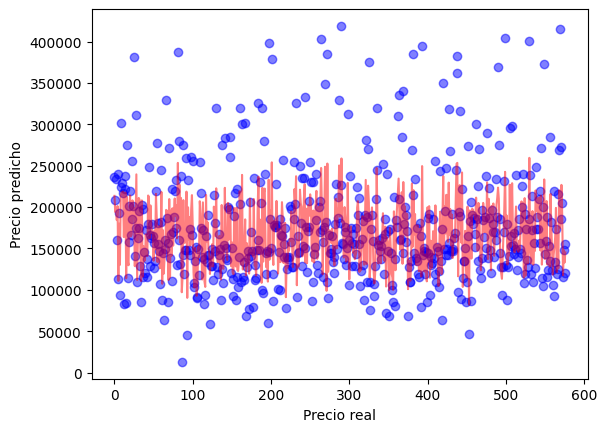

🔁 Cross-validation - SVR(kernel='rbf'):
R² per fold: [0.16344736 0.16327599 0.16736728 0.17120624 0.15951044]
Average R²: 0.1650
Standard deviation: 0.0040
Error metrics for rbf:
📏 MAE (SVR rbf): 42,728.19
📏 MSE (SVR rbf): 3,932,198,779.38
📏 R2 (SVR rbf): 0.16


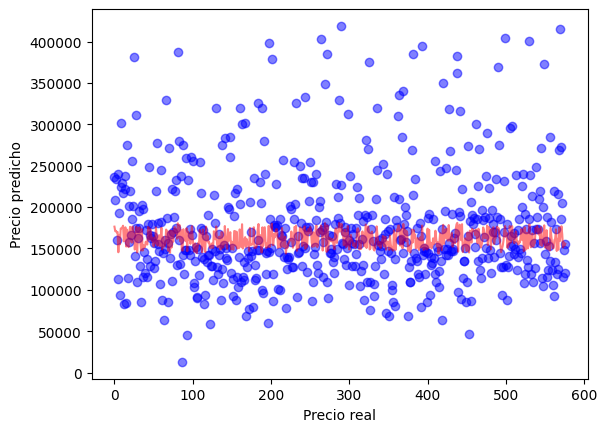

🔁 Cross-validation - SVR(kernel='poly'):
R² per fold: [0.86839495 0.86391434 0.75522916 0.86207163 0.75680427]
Average R²: 0.8213
Standard deviation: 0.0533
Error metrics for poly:
📏 MAE (SVR poly): 17,019.79
📏 MSE (SVR poly): 618,606,864.97
📏 R2 (SVR poly): 0.87


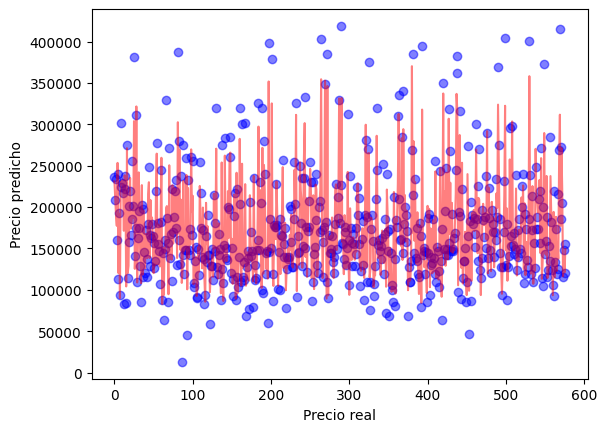

In [49]:
def train_test_models(name, model, X_train_scaled, y_train, X_test_scaled, y_test):
    """Train and test the models, and print the error metrics."""
    # Create the pipeline with scaling and the polynomial SVR model
    svr_poly_pipeline = Pipeline([
        ('scaler', MinMaxScaler()),
        ('svr', model)
        ])
    cv = KFold(n_splits=5, shuffle=True, random_state=42)
    scores = cross_val_score(svr_poly_pipeline, X, y, cv=cv, scoring='r2')
    # Display results
    printing(f"🔁 Cross-validation - SVR(kernel='{name}'):")
    print("R² per fold:", scores)
    print(f"Average R²: {scores.mean():.4f}")
    print(f"Standard deviation: {scores.std():.4f}")
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    print_error_metrics(y_test, y_pred, name)
    plot_results(y_test, y_pred)
    return {
        'model': model,
        'y_pred': y_pred,
        'scores': scores
    }

# Defining the models to be used:
models = {
    'linear': svm.SVR(kernel='linear', C=100, gamma='scale', epsilon=0.1),
    'rbf': svm.SVR(kernel='rbf', C=100, gamma='scale', epsilon=0.1, coef0=0.01),
    'poly': svm.SVR(kernel='poly', C=100, gamma='scale', degree=6, coef0=0.01)
}

# Training and testing the models:
results = {
        name: train_test_models(
                name,
                model,
                X_train_scaled,
                y_train,
                X_test_scaled,
                y_test) for name, model in models.items()
    }

C:\Users\vinyl\AppData\Local\Temp\ipykernel_4256\3094422046.py:41: UserWarning:

Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.

c:\Users\vinyl\OneDrive\Documentos\Teclab\ml_clasificacion_regresion\ml_clasificacion_regresion\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning:

Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.



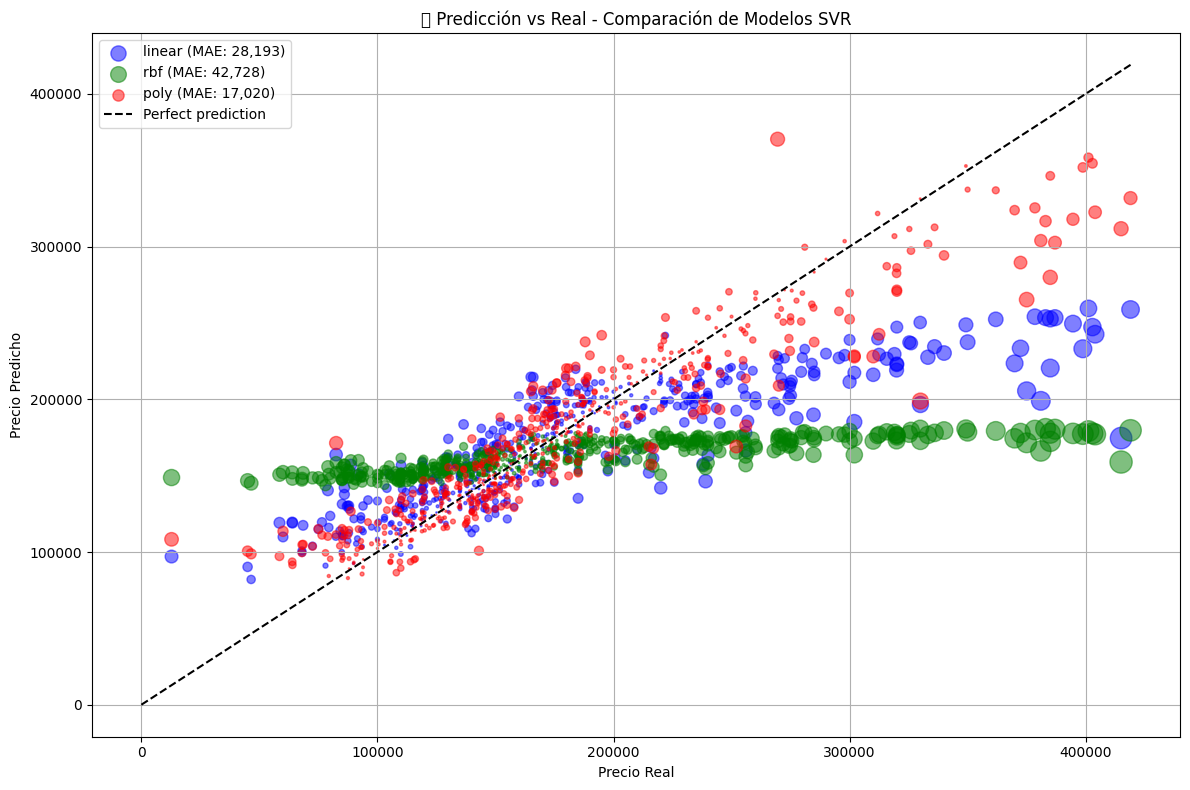

In [ ]:
def plot_bubble_predictions(y_test, results_dict):
    """
    Displays a bubble chart showing the predictions of multiple models compared to the actual value.

    :param y_test: real values of the target variable
    :param results_dict: dictionary with the results of the models
    """
    plt.figure(figsize=(12, 8))

    # Convert y_test to np.array if in Pandas Series format
    y_real = np.array(y_test[:len(list(results_dict.values())[0]['y_pred'])])

    colors = {
        'linear': 'blue',
        'rbf': 'green',
        'poly': 'red'
    }

    for name, result in results_dict.items():
        y_pred = result['y_pred']
        error = np.abs(y_real - y_pred)

        plt.scatter(
            y_real,
            y_pred,
            s=error / 1000,  # bubble size proportional to the error
            alpha=0.5,
            label=f"{name} (MAE: {mean_absolute_error(y_real, y_pred):,.0f})",
            color=colors.get(name, 'gray')
        )

    # Perfect reference line (prediction = actual)
    max_val = max(y_real.max(), max(res['y_pred'].max() for res in results_dict.values()))
    plt.plot([0, max_val], [0, max_val], color='black', linestyle='--', label='Perfect prediction')

    plt.title("Prediction vs Real - SVR Model Comparison")
    plt.xlabel("Real Price")
    plt.ylabel("Predicted Price")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

plot_bubble_predictions(y_test, results)

# ✍️ Conclusión

Durante este trabajo se exploró el uso de modelos de regresión por vectores de soporte (SVR) para predecir el precio de viviendas a partir del dataset Ames Housing. Se aplicó un proceso riguroso de limpieza de datos, imputación, codificación, detección de outliers y análisis de correlaciones, lo que permitió construir un conjunto de datos robusto y optimizado para el entrenamiento de modelos.

Se evaluaron tres configuraciones principales de SVR utilizando diferentes kernels:

- linear (lineal)
- rbf (radial)
- poly (polinómico, grado 6)

Cada modelo fue entrenado y evaluado utilizando escalado Min-Max y las métricas MAE, MSE y R² sobre el conjunto de test.

Además, se realizó validación cruzada (5-fold) para estimar la capacidad de generalización del modelo polinómico, ajustando el parámetro C (regularización) hasta encontrar un buen equilibrio entre rendimiento y estabilidad.

## 📌 Resultados destacados:
El modelo SVR con kernel polinómico (degree=6, C=200) alcanzó un R² promedio de 0.8291 en validación cruzada, con una desviación estándar de solo 0.0739, lo que indica un alto poder predictivo y buena generalización.

Se descartaron variables con baja correlación con la variable objetivo y también variables redundantes altamente correlacionadas entre sí, reduciendo dimensionalidad y evitando sobreajuste.

El uso de pipelines y preprocesamiento adecuado fue clave para lograr estabilidad y reproducibilidad en los modelos evaluados.

## 🧠 Conclusión técnica:
El modelo SVR polinómico (grado 6, C=200) es el mejor balance entre precisión y generalización. Supera a las versiones lineal y RBF en términos de MAE y R², manteniendo una buena estabilidad entre los distintos folds de validación cruzada.
Este enfoque demuestra ser altamente efectivo para problemas de regresión con relaciones no lineales complejas como el de precios inmobiliarios.